# Assignment: Unsupervised Machine Learning \ Clustering

## Part 1: Partitional Clustering

In this assignment you will experience with partitional & mixture model clustering. The analyses are made on real datasets under the circumstances of real life challenges in unsupervised machine learning.

In [1]:
import numpy as np
from sklearn.cluster import KMeans
from scipy.spatial.distance import squareform
from scipy.cluster import hierarchy
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline

### Read blood test results as an EMR from an Excel file

In [2]:
# Open the file
xlsx = pd.ExcelFile('EMR-Blood.xlsx')

# Get the first sheet as an object
sheet1 = xlsx.parse(0)

# Set the Key column as the index
sheet1.set_index("Key", inplace=True)

# Show first 10 rows
sheet1.head(10)

,Na,K,ALT,AST,WBC,RBC,Hgb,Hct
Key,,,,,,,,
1,141,4.65,31.92,35.01,10.25,4.06,17.6,36.3
2,140,4.96,36.41,16.70,6.13,3.80,13.2,35.6
3,136,3.66,41.43,13.17,5.86,4.26,16.2,43.7
4,136,4.74,23.92,30.33,10.80,4.83,16.1,49.8
5,140,4.74,43.66,20.44,6.59,4.05,12.6,39.1
6,146,3.98,48.41,33.22,4.53,4.04,17.9,47.3
7,144,5.29,44.29,19.28,10.12,3.96,17.2,47.9
8,138,4.57,50.43,16.39,4.66,4.91,13.7,41.5
9,144,3.96,31.51,34.87,4.57,4.72,15.1,47.6


### Blood Test Abbreviations
- Na == Sodium
- K == Potassium
- ALT == Alanine transaminase
- AST == Aspartate transaminase
- WBC == White blood cells
- RBC == Red blood cells
- Hgb == Hemoglobin
- Hct == Hematocrit

### Use K-Means to create clusters according to variables of uniform distribution

In [3]:
#Retrieve the K, WBC and Hgb column values from the dataset to cluster
variables1 = ["K","WBC","Hgb"]
EMR3d1 = sheet1.loc[:, variables1].values

# Run the K-Means algorithm, assuming the correct number of clusters is 5
y_pred_KMeans1 = KMeans(n_clusters=5,
max_iter=999, n_init=10, random_state=0, ).fit(EMR3d1).labels_


### Make a 3D chart

C:\Users\sfrie\anaconda3\envs\py4dp\lib\site-packages\ipykernel_launcher.py:3: MatplotlibDeprecationWarning: Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.
  This is separate from the ipykernel package so we can avoid doing imports until


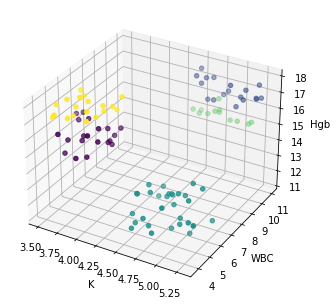

In [4]:
def make_chart (chart_data, y_pred, labels):
    fig = plt.figure()
    ax = Axes3D(fig,)
    ax.set_xlabel(labels[0])
    ax.set_ylabel(labels[1])
    ax.set_zlabel(labels[2])
    ax.scatter(chart_data[:,0], chart_data[:,1], chart_data[:,2], c=y_pred)

make_chart(EMR3d1, y_pred_KMeans1, variables1)

In [5]:
# x = np.random.randint(0,10, size = (5,4))
# x

In [6]:
# k_val = 3
# centroids = []
# for k in range(k_val):
#     centroid_features = []
#     for feat in range(x.shape[1]):
#         centroid_features.append(np.random.choice(np.arange(x[:, feat].min(), x[:, feat].max()+1)))
#     centroids.append(centroid_features)

The Sklearn version 

## Task 1 (_max score - 50 points_)
Implement  Lloyd's Algorithm for solving the K-Means problem, as shown in class. 
By examining the WCSS, choose a proper threshold to determine algorithm convergence.

Check your algorithm on 'EMR-Blood.xlsx' dataset. Compare your results to the _sklearn_ version - what can affect any differences you might've got?

In [7]:
# Add your code for Challenge 210 after this line, and keep it in this cell.

# Implement K-Means (X being the data)
class k_means:
    # labels = None

    def __init__(self):
        pass
    def fit(self, x, k):
        x = np.array(x)
        #Initiate centroid locations
        centroids = x[np.random.randint(x.shape[0], size=k), :] #choose random points from out data as centroid initiations.
        prev = 1
        WCSS = 0
        while prev-WCSS >= 0.01:
            prev = WCSS
            #Calculate distances of each point to each centroid, and update class to that centroid
            euc = np.array([np.linalg.norm(points - centroids, axis = 1) for points in x])
            # print('euc:', euc)
            #create labels for each point, corresponding to centroid with shortest distance
            labels = np.argmin(euc, axis = 1)
            # print('labels:', labels)
            
            # calculate WCSS, then calculate new central positions if it has not converged yet.
            WCSS = np.sum(np.average([np.linalg.norm(x - centroids[cent], axis = 1) for cent in range(k)]))
            # iteration +=1
            # print(iteration)
            if prev - WCSS <= 0.01:
                self.labels = labels
                self.WCSS = WCSS
                self.centroids = centroids
                # self.prev = prev
            else:
                centroids = [np.average(x[labels==cent], axis = 0) for cent in range(k)]
            
            # print(prev)
            # print(WCSS)
    # def predict(self, X):
    #     pass

# k = k_means()
# k.fit(x, 3)

In [8]:
kmm = k_means()
kmm.fit(EMR3d1, 5)

C:\Users\sfrie\anaconda3\envs\py4dp\lib\site-packages\ipykernel_launcher.py:3: MatplotlibDeprecationWarning: Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.
  This is separate from the ipykernel package so we can avoid doing imports until


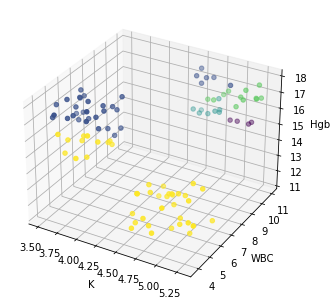

In [9]:
make_chart(EMR3d1, kmm.labels, variables1)

In [10]:
k = k_means()

In [11]:
k.fit(EMR3d1, 3)

## Task 2 (_max score - 30 points_)

Humans can clearly spot 3 clusters, however, for machines it's much harder to "learn" that. In the above implementation, K-Means was given the value of 5 as K.
Develop a **generic** mechanism for finding the most reasonable number of clusters by:
1. Iterating K over a reasonable range, which should be derived from the number of points
2. Choose a proper K based on the heuristics learned in class
3. Showing the final clusters in a 3D chart (for your implementation of K-Means algorithm)

In [ ]:
# Add your code for Challenge 211 after this line, and keep it in this cell.




### Silhouette analysis

Use graphic visualization of the Silhouette score to support your above answer:

In [ ]:
# Add your code for the Sillhouette graphic analysis
# You can use scikit-learn Sillhouette page as a reference

from sklearn.metrics import silhouette_samples, silhouette_score

def plot_Silhouette(X, y, num_clusters):
    # YOUR CODE HERE
    pass


#### From this section on - please use the sklearn's K-means

## Part 2: Mixture Models Clustering 

### Use K-Means to create clusters according to variables of both uniform and Gaussian distributions

In [ ]:
# Retrieve the ALT, AST and RBC column values from the dataset to cluster
variables2 = ["ALT","AST","RBC"]
EMR3d2 = sheet1.loc[:, variables2].values

# Run the K-Means algorithm
# NOTICE, this time, we know that the correct number of clusters is 2
y_pred_KMeans2 = # YOUR CODE HERE

# Make a 3D chart
make_chart(EMR3d2, y_pred_KMeans2, variables2)

## Task 3 (_max score - 20 points_)
Scientists have found that in this population of patients, RBC distribution is uniform, ALT distribution is a Gaussian and AST distribution is a mixture of two Gaussians. Clearly, even by giving K-Means the correct K, the algorithm got to the wrong conclusion. This separation is "technically" correct, but lacks some underlying understanding of the natural phenomena.

What is the "problem" with this separation?

In [ ]:
# Your answer here


In order to exploit the Gaussian characteristic of the AST
1. Find the 2 componenets that comprise the AST feature by applying the GMM algorith with the proper number of components.
2. Assume that the clusters above are correct for the entire dataset (including the other features).
3. Show the final clusters (of EMR3d2) in a 3D chart

In [ ]:
# Add your code for Challenge 212 after this line, and keep it in this cell.




What is the difference between the two clustering results above?

Which one, given the domain knowledge provided to you, makes more sense?




# Good Luck!

